In [1]:
from src import CompositeDataset
import matplotlib.pyplot as plt
import sys
# print(sys.path)

from graphcast import icosahedral_mesh

In [2]:

omni_dir = "/mnt/ionosphere-data/omniweb/processed/"
# gim_parquet = "/mnt/ionosphere-data/jpld_gim/parquet/jpld_gim_201005130000_202407312345.parquet"
gim_parquet = "/mnt/ionosphere-data/jpld/webdataset"
celestrak_file = "/mnt/ionosphere-data/celestrak/kp_ap_processed_timeseries.csv"
solar_index_file = "/mnt/ionosphere-data/solar_env_tech_indices/Indices_F10_processed.csv"

ds = CompositeDataset(
    dataset_jpld_dir=gim_parquet, 
    celestrak_data_file=celestrak_file, 
    solar_index_data_file=solar_index_file,
    omniweb_dir=omni_dir,
    date_start=None, 
    date_end=None
)


JPLD
Directory  : /mnt/ionosphere-data/jpld/webdataset
Loading tar files index from cache: /mnt/ionosphere-data/jpld/webdataset/tar_files_index


Start date : 2010-05-13 00:00:00
End date   : 2024-07-31 23:45:00
Delta      : 15 minutes
Loading dates from cache: /mnt/ionosphere-data/jpld/webdataset/dates_index_2010-05-13T00:00:00_2024-07-31T23:45:00
TEC maps total    : 498,623
TEC maps available: 498,481
TEC maps dropped  : 142
Celestrak Dataset
Head of data file: 

                           Kp        Ap
Datetime                               
1957-10-01 00:00:00  1.531564  1.012923
1957-10-01 03:00:00  1.317561  0.747159
1957-10-01 06:00:00  0.604218  0.109327
1957-10-01 09:00:00 -0.109126 -0.315895
1957-10-01 12:00:00  1.103558  0.481396

Checking date range of data in file: /mnt/ionosphere-data/celestrak/kp_ap_processed_timeseries.csv
Start date : 1957-10-01 00:00:00
End date   : 2025-08-14 21:00:00
Number of days in dataset   : 24,790
Number of samples in dataset: 198,320
Size on disk                : 0.01 GB
Solar Index Dataset
Head of data file: 

                          F10       S10       M10       Y10
Datetime        

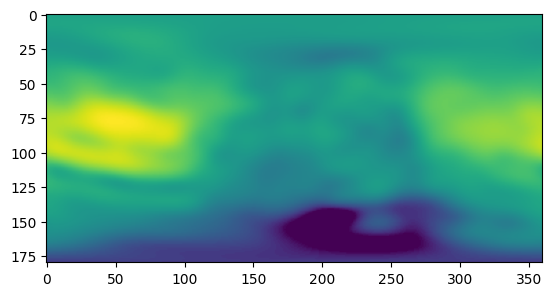

In [20]:
plt.imshow(ds[0]["gim"][0][0]), ds[0]["gim"][0][0].shape
tec_map = ds[0]["gim"][0][0]

In [8]:
import numpy as np

n_lat = 180
n_lon = 360
lat = np.linspace(-90, 90, n_lat)
lon = np.linspace(0, 360, n_lon)


In [15]:
mesh = icosahedral_mesh.get_last_triangular_mesh_for_sphere(splits=5) # adjust splits as needed
# mesh_lat, mesh_lon = lat_lon_deg_to_spherical(mesh.vertices[:,0], mesh.vertices[:,1])


In [16]:
mesh.vertices.shape, mesh.faces.shape

((10242, 3), (20480, 3))

In [18]:
from graphcast import grid_mesh_connectivity
grid_indices, mesh_indices = grid_mesh_connectivity.in_mesh_triangle_indices(grid_latitude = lat, grid_longitude = lon, mesh = mesh)


In [19]:
grid_indices, mesh_indices

(array([    0,     0,     0, ..., 64799, 64799, 64799], shape=(194400,)),
 array([7248, 7249, 7247, ..., 5304, 5305, 5303],
       shape=(194400,), dtype=int32))

In [11]:
180 * 360 - 1

64799

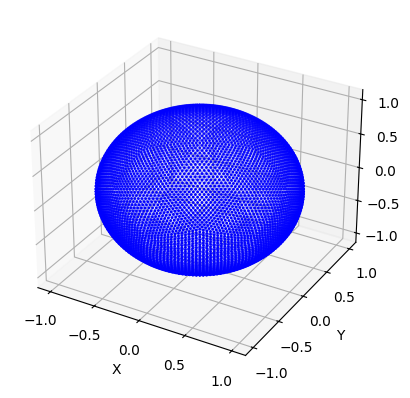

In [ ]:
# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plot the points
ax.scatter(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2], c='blue', s=1)  # 's' controls point size
# ax.scatter(mesh.faces[:, 0], mesh.faces[:, 1], mesh.faces[:, 2], c='blue', s=1)  # 's' controls point size

# Optional: set axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Show plot
plt.show()